<a href="https://colab.research.google.com/github/kzar1n/datascience/blob/master/Trabalho_Precifica%C3%A7%C3%A3o_de_Im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando as bibliotecas**

In [123]:
!pip install descartes

In [109]:
!pip install geopy

In [110]:
!pip install geopandas

In [0]:
from IPython.display import clear_output
from pathlib import Path
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
from descartes import PolygonPatch
from geopy.geocoders import Bing, ArcGIS

import timeit
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Importando os arquivos

In [0]:
# arquivo = 'PesquisaMercadoCompleta_2008.xlsx'
# arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2008.xlsx?raw=true'
arquivo = 'https://bit.ly/2T5vklu'
PesquisaMercadoCompleta_2008 = pd.read_excel(arquivo)

In [0]:
# arquivo = 'PesquisaMercadoCompleta_2008_2012.xlsx'
# arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2008_2012.xlsx?raw=true'
arquivo = 'https://bit.ly/2NyrNWG'
PesquisaMercadoCompleta_2008_2012 = pd.read_excel(arquivo)

In [0]:
# arquivo = 'PesquisaMercadoCompleta_2013_2017.xlsx'
# arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2013_2017.xlsx?raw=true'
arquivo = 'https://bit.ly/2EEd0XN'
PesquisaMercadoCompleta_2013_2017 =pd.read_excel(arquivo)

In [0]:
# arquivo = 'PesquisaMercadoCompleta_2018_2019.xlsx'
#arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2018_2019.xlsx?raw=true'
arquivo = 'https://bit.ly/2tK6xnQ'
PesquisaMercadoCompleta_2018_2019 = pd.read_excel(arquivo)

## Preparando dataset

Concatenando bases

In [0]:
data = pd.concat([PesquisaMercadoCompleta_2008, 
                  PesquisaMercadoCompleta_2008_2012,
                  PesquisaMercadoCompleta_2013_2017,
                  PesquisaMercadoCompleta_2018_2019])

Verificando totais

In [117]:
print('PesquisaMercadoCompleta_2008: ', PesquisaMercadoCompleta_2008.shape )
print('PesquisaMercadoCompleta_2008_2012: ', PesquisaMercadoCompleta_2008_2012.shape)
print('PesquisaMercadoCompleta_2013_2017: ', PesquisaMercadoCompleta_2013_2017.shape)
print('PesquisaMercadoCompleta_2018_2019: ', PesquisaMercadoCompleta_2018_2019.shape)
print('Data: ', data.shape)

PesquisaMercadoCompleta_2008:  (854, 74)
PesquisaMercadoCompleta_2008_2012:  (3665, 74)
PesquisaMercadoCompleta_2013_2017:  (5121, 74)
PesquisaMercadoCompleta_2018_2019:  (1102, 74)
Data:  (10742, 74)


Exibindo informações da base

In [0]:
data.info()

Selecionando apenas as variáveis que vamos trabalhar

In [0]:
data = pd.DataFrame(data, columns = ['Endereço', 
                                     'Bairro',
                                     'Distrito',
                                     'Região', 
                                     'Cidade',
                                     'UF', 
                                     'CEP', 
                                     'Zoneamento', 
                                     'Setor', 
                                     'Quadra', 
                                     'Nº de Elevadores',
                                     'Dormitórios', 
                                     'Suítes', 
                                     'Banheiros', 
                                     'Nº Vagas', 
                                     'Área Privativa',
                                     'Área Total',
                                     'Nº Unidades por Pavimento', 
                                     'Nº de Pavimentos',
                                     '(VMU)Preço de venda da unidade no lançamento',
                                     '(VUV)Preço m2 privativo no lançamento',
                                     '% Unidades Vendidas',
                                     'Unidades Vendidas'])

## Análises

Matriz de correlações

In [120]:
data.corr()

,Setor,Quadra,Nº de Elevadores,Dormitórios,Suítes,Banheiros,Nº Vagas,Área Privativa,Área Total,Nº Unidades por Pavimento,Nº de Pavimentos,(VMU)Preço de venda da unidade no lançamento,(VUV)Preço m2 privativo no lançamento,% Unidades Vendidas,Unidades Vendidas
Setor,1.000000,0.077175,-0.055618,0.050832,-0.026291,-0.020780,-0.005041,-0.010342,-0.005218,-0.117356,-0.038292,0.005997,-0.085213,0.070362,0.086385
Quadra,0.077175,1.000000,-0.074227,0.032765,-0.010304,-0.004580,0.005421,-0.008561,-0.010071,-0.042485,-0.058619,-0.028482,-0.106298,0.047012,0.079346
Nº de Elevadores,-0.055618,-0.074227,1.000000,0.091041,0.145758,0.142400,0.124701,0.118134,0.113988,0.207524,0.490976,0.081955,0.110237,-0.004171,-0.026600
Dormitórios,0.050832,0.032765,0.091041,1.000000,0.711292,0.805471,0.644979,0.618910,0.616103,-0.525634,0.199732,0.363268,-0.132033,0.073433,-0.071836
Suítes,-0.026291,-0.010304,0.145758,0.711292,1.000000,0.920586,0.750092,0.731132,0.718874,-0.486733,0.249938,0.530769,0.194571,0.009840,-0.237063
Banheiros,-0.020780,-0.004580,0.142400,0.805471,0.920586,1.000000,0.729086,0.721349,0.710796,-0.504893,0.256540,0.510539,0.128984,0.012985,-0.221011
Nº Vagas,-0.005041,0.005421,0.124701,0.644979,0.750092,0.729086,1.000000,0.829113,0.822554,-0.504603,0.198444,0.627743,0.182089,0.045974,-0.228189
Área Privativa,-0.010342,-0.008561,0.118134,0.618910,0.731132,0.721349,0.829113,1.000000,0.975881,-0.448278,0.194215,0.801157,0.196459,0.022253,-0.255187
Área Total,-0.005218,-0.010071,0.113988,0.616103,0.718874,0.710796,0.822554,0.975881,1.000000,-0.450490,0.186809,0.758454,0.168590,0.037392,-0.245649
Nº Unidades por Pavimento,-0.117356,-0.042485,0.207524,-0.525634,-0.486733,-0.504893,-0.504603,-0.448278,-0.450490,1.000000,0.001145,-0.287873,0.057796,-0.082849,0.089123


Matriz de correlações (gráfica)

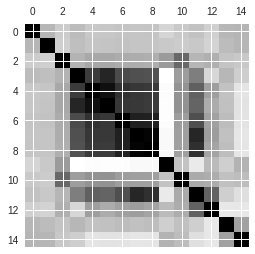

In [121]:
plt.matshow(data.corr())

Verificando as correlações com o preço de venda

In [122]:
data.corr()['(VMU)Preço de venda da unidade no lançamento'].sort_values(ascending=False)

(VMU)Preço de venda da unidade no lançamento    1.000000
Área Privativa                                  0.801157
Área Total                                      0.758454
Nº Vagas                                        0.627743
Suítes                                          0.530769
(VUV)Preço m2 privativo no lançamento           0.521937
Banheiros                                       0.510539
Dormitórios                                     0.363268
Nº de Pavimentos                                0.137437
Nº de Elevadores                                0.081955
Setor                                           0.005997
Quadra                                         -0.028482
% Unidades Vendidas                            -0.077905
Unidades Vendidas                              -0.196777
Nº Unidades por Pavimento                      -0.287873
Name: (VMU)Preço de venda da unidade no lançamento, dtype: float64

## Geolocalização

Criando dataframe de localização com o endereço completo e tirando os duplicados para não sobrecarregar a API de geocodificação

In [125]:
data['end_original'] = data['Endereço'] + ", " + data['Bairro'] + ", " + data['UF'] + ", " + data['Cidade'] + ", " + data['CEP']

data_local = pd.DataFrame()
data_local['end_original'] = data['end_original']
data_local.drop_duplicates(inplace=True)
data_local.reset_index(inplace=True, drop=True)


data_local.shape

(2658, 1)

Instanciando o objeto geodecodificador

In [0]:
api_key = 'Am0Znblz-vMtAx-tV1rlNWBnJILE0IQTBK4fKjnJ_o2c0o4sEKpEdIyQCEdEjbtI'
# geocoder = Bing(api_key, timeout = 10)
geocoder = ArcGIS(timeout = 10)

**Atenção... essa célula demora para executar completamente..**

---

Lógica para geodecodificar um endereço de cada vez. Isso é necessário para que a API de geodecodificação não dê timeout

Depois de executada a API, salva em um arquivo externo e caso seja necessário buscar a informação novamente, busca-se os dados salvos em arquivo

In [127]:
data_local['end_geocod'] = np.nan
my_file = Path("data_local.csv")
tamanho = data_local.shape[0]
x = 0

if my_file.is_file():
  data_local = pd.read_csv(my_file, index_col=False)
else:
  porcentagem = 0
  start = timeit.default_timer()

  for i in range(0, tamanho):
    data_local['end_geocod'][i:i+1] = data_local['end_original'][i:i+1].apply(geocoder.geocode)
    porcentagem = (i / tamanho) * 100
    x = x + ((1 / tamanho) * 100)
    if (x >= 1) or (i >= tamanho):
      clear_output()
      print("%2.1f " % porcentagem, "%")
      x=0

  stop = timeit.default_timer()
  print('Aproximadamente ', round((stop - start)/60), ' min de processamento...')
  
  data_local['Latitude'] = data_local['end_geocod'].apply(lambda x: x.latitude if x != None else None)
  data_local['Longitude'] = data_local['end_geocod'].apply(lambda x: x.longitude if x != None else None)
  
  data_local.to_csv(my_file, index=False)

99.5  %
Aproximadamente  37  min de processamento...


Juntando a base original com as coordenadas encontradas

In [0]:
data = pd.merge(data, data_local, how='left', on='end_original')

Alterando CRS e criando GeoDataFrame

In [129]:
crs = {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geometry = [Point(x) for x in zip(data.Longitude, data.Latitude)]
geo_data = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

to_crs = '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'
geo_data = geo_data.to_crs(to_crs)

geo_data.head()


,Endereço,Bairro,Distrito,Região,Cidade,UF,CEP,Zoneamento,Setor,Quadra,...,Nº de Pavimentos,(VMU)Preço de venda da unidade no lançamento,(VUV)Preço m2 privativo no lançamento,% Unidades Vendidas,Unidades Vendidas,end_original,end_geocod,Latitude,Longitude,geometry
0,"R SERIDO, 106",JARDIM EUROPA,PINHEIROS,SUL,SAO PAULO,SP,01455-040,ZM 2,83,125,...,31,6110900.0,12175.29,100.0,31,"R SERIDO, 106, JARDIM EUROPA, SP, SAO PAULO, 0...","(Rua Seridó 106, Pinheiros, São Paulo, 01455-0...",-23.583103,-46.689767,POINT (327.5657527610896 7390.911036228739)
1,"R SERIDO, 106",JARDIM EUROPA,PINHEIROS,SUL,SAO PAULO,SP,01455-040,ZM 2,83,125,...,31,4891200.0,12071.08,100.0,31,"R SERIDO, 106, JARDIM EUROPA, SP, SAO PAULO, 0...","(Rua Seridó 106, Pinheiros, São Paulo, 01455-0...",-23.583103,-46.689767,POINT (327.5657527610896 7390.911036228739)
2,"R SERIDO, 106",JARDIM EUROPA,PINHEIROS,SUL,SAO PAULO,SP,01455-040,ZM 2,83,125,...,31,10973100.0,15292.88,100.0,1,"R SERIDO, 106, JARDIM EUROPA, SP, SAO PAULO, 0...","(Rua Seridó 106, Pinheiros, São Paulo, 01455-0...",-23.583103,-46.689767,POINT (327.5657527610896 7390.911036228739)
3,"R SERIDO, 106",JARDIM EUROPA,PINHEIROS,SUL,SAO PAULO,SP,01455-040,ZM 2,83,125,...,31,13773700.0,14795.00,100.0,1,"R SERIDO, 106, JARDIM EUROPA, SP, SAO PAULO, 0...","(Rua Seridó 106, Pinheiros, São Paulo, 01455-0...",-23.583103,-46.689767,POINT (327.5657527610896 7390.911036228739)
4,"R SERIDO, 106",JARDIM EUROPA,PINHEIROS,SUL,SAO PAULO,SP,01455-040,E4 - R301,83,125,...,31,5020400.0,12389.93,100.0,31,"R SERIDO, 106, JARDIM EUROPA, SP, SAO PAULO, 0...","(Rua Seridó 106, Pinheiros, São Paulo, 01455-0...",-23.583103,-46.689767,POINT (327.5657527610896 7390.911036228739)


Plotando imóveis

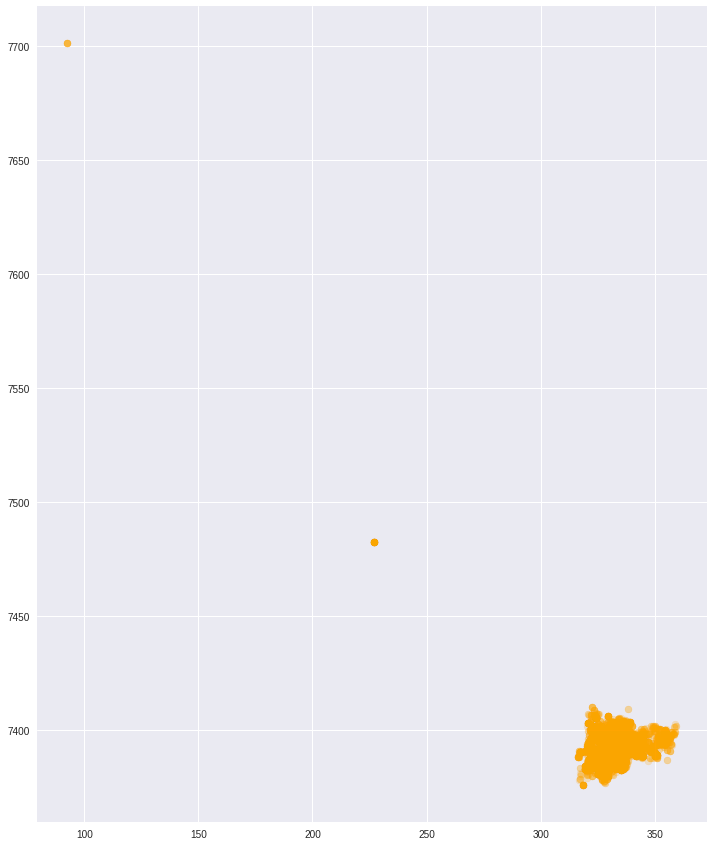

In [130]:
geo_data.plot(color='orange', figsize=(30,15), alpha=0.2)

Importando shapefile da cidade de São Paulo

In [131]:
sp = gpd.read_file('35MUE250GC_SIR.shp')
sp = sp[sp['NM_MUNICIP'] == 'SÃO PAULO']
sp = sp.to_crs(to_crs)

sp.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

Importando shapefile dos setores sensorais de São Paulo

In [0]:
# setores = gpd.read_file('35SEE250GC_SIR.shp')
# setores['NM_MUNICIP'].value_counts()
# setores = setores[setores['NM_MUNICIP'] == 'SÃO PAULO']
# setores = setores.to_crs(to_crs)

# setores.crs

Identificando outliers

In [0]:
out = [not x for x in geo_data['geometry'].within(sp.iloc[0].geometry)]

fora_de_sp = geo_data[out]

In [134]:
fora_de_sp

,Endereço,Bairro,Distrito,Região,Cidade,UF,CEP,Zoneamento,Setor,Quadra,...,Nº de Pavimentos,(VMU)Preço de venda da unidade no lançamento,(VUV)Preço m2 privativo no lançamento,% Unidades Vendidas,Unidades Vendidas,end_original,end_geocod,Latitude,Longitude,geometry
1466,"AV DOS REMEDIOS, 376",VILA DOS REMEDIOS,JAGUARA,NORTE,SAO PAULO,SP,05107-000,ZC,199,117,...,16,343000.0,5675.99,100.000000,266,"AV DOS REMEDIOS, 376, VILA DOS REMEDIOS, SP, S...","(Avenida dos Remédios, Jaguara, São Paulo, 051...",-23.517083,-46.753187,POINT (321.0032093025686 7398.144436285455)
1467,"AV DOS REMEDIOS, 376",VILA DOS REMEDIOS,JAGUARA,NORTE,SAO PAULO,SP,05107-000,ZC,199,117,...,16,281800.0,5961.50,100.000000,128,"AV DOS REMEDIOS, 376, VILA DOS REMEDIOS, SP, S...","(Avenida dos Remédios, Jaguara, São Paulo, 051...",-23.517083,-46.753187,POINT (321.0032093025686 7398.144436285455)
2851,"R NOVA YORK, 185",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 2,85,124,...,30,1362100.0,8376.48,100.000000,60,"R NOVA YORK, 185, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 185, Paulista, Piracicaba, São Paulo...",-22.740006,-47.658988,POINT (226.9145635100578 7482.810379430039)
2852,"R NOVA YORK, 185",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 2,85,124,...,30,1545100.0,8387.71,100.000000,60,"R NOVA YORK, 185, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 185, Paulista, Piracicaba, São Paulo...",-22.740006,-47.658988,POINT (226.9145635100578 7482.810379430039)
2853,"R NOVA YORK, 185",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 2,85,124,...,30,2141300.0,9479.81,100.000000,2,"R NOVA YORK, 185, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 185, Paulista, Piracicaba, São Paulo...",-22.740006,-47.658988,POINT (226.9145635100578 7482.810379430039)
2854,"R NOVA YORK, 185",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 2,85,124,...,30,2432200.0,9480.04,100.000000,2,"R NOVA YORK, 185, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 185, Paulista, Piracicaba, São Paulo...",-22.740006,-47.658988,POINT (226.9145635100578 7482.810379430039)
2899,"R NOVA YORK, 764",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 3b,85,129,...,27,382100.0,10694.09,100.000000,131,"R NOVA YORK, 764, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 764, Paulista, Piracicaba, São Paulo...",-22.741180,-47.657848,POINT (227.0340422788675 7482.682436017034)
2900,"R NOVA YORK, 764",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 3b,85,129,...,27,496900.0,9626.11,100.000000,67,"R NOVA YORK, 764, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 764, Paulista, Piracicaba, São Paulo...",-22.741180,-47.657848,POINT (227.0340422788675 7482.682436017034)
2901,"R NOVA YORK, 764",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 3b,85,129,...,27,843700.0,7334.61,100.000000,1,"R NOVA YORK, 764, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 764, Paulista, Piracicaba, São Paulo...",-22.741180,-47.657848,POINT (227.0340422788675 7482.682436017034)
2902,"R NOVA YORK, 764",BROOKLIN PAULISTA,ITAIM BIBI,SUL,SAO PAULO,SP,04560-001,ZM 3b,85,129,...,27,724000.0,9299.94,100.000000,23,"R NOVA YORK, 764, BROOKLIN PAULISTA, SP, SAO P...","(Rua Nova 764, Paulista, Piracicaba, São Paulo...",-22.741180,-47.657848,POINT (227.0340422788675 7482.682436017034)


In [140]:
# geocoder = Bing(api_key, timeout = 10)
# fora_de_sp['end_geocod'] = fora_de_sp['end_original'].apply(geocoder.geocode)
# fora_de_sp

35

In [0]:
geo_data = geo_data[geo_data['geometry'].within(sp.iloc[0].geometry)]

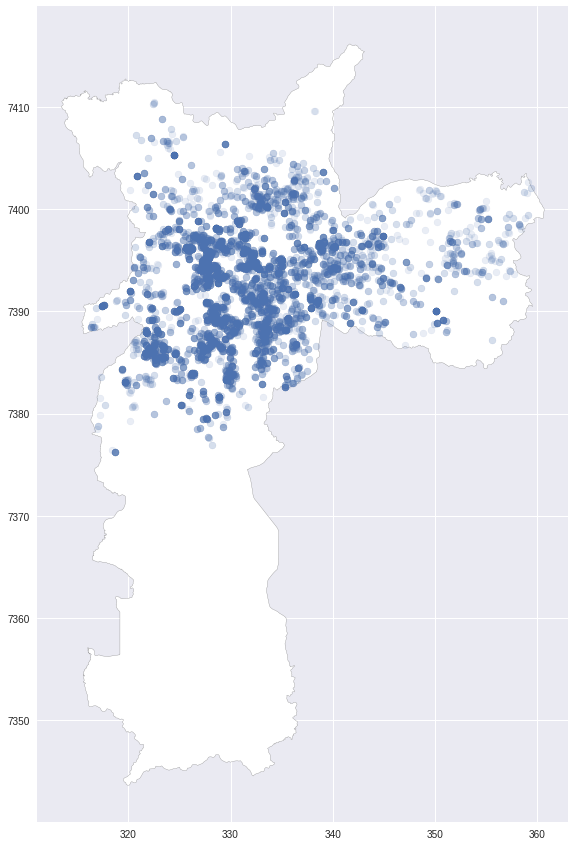

In [137]:
base = sp['geometry'].plot(color='white', edgecolor='grey', figsize=(30,15))
geo_data.plot(ax=base, figsize=(30,15), alpha=0.12)